# 機器學習 - 決策樹模型 (Decision Tree Model) (2)
- 學期: 111 機器學習 Summer Session 教材 (師培中心)
- 杜主民

# 決策樹模型 - 使用 sklearn 套件

## 一、建立 iris 資料集決策樹模型

In [5]:
from sklearn import tree
from sklearn import datasets
import pydotplus

### STEP 1: 載入 iris 資料集

In [6]:
iris = datasets.load_iris()

### STEP 2: 建立特徵X，與目標y

In [7]:
X = iris.data
y = iris.target

### STEP 3: 建立決策樹模型
- 使用 entropy 計算亂度

In [8]:
dTree = tree.DecisionTreeClassifier(criterion='entropy')

### STEP 4: 訓練決策樹模型

In [9]:
dTree = dTree.fit(X,y)

### STEP 5: 檢核訓練成果

In [10]:
dTree.score(X, y)

1.0

### STEP 6: 決策模型輸出

In [11]:
# 方法一
dot_data = tree.export_graphviz(dTree, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('iris.pdf')  # 印出決策樹至 pdf 檔案

True

In [13]:
# 方法二
import graphviz
dot_data = tree.export_graphviz(dTree, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris")

'iris.pdf'

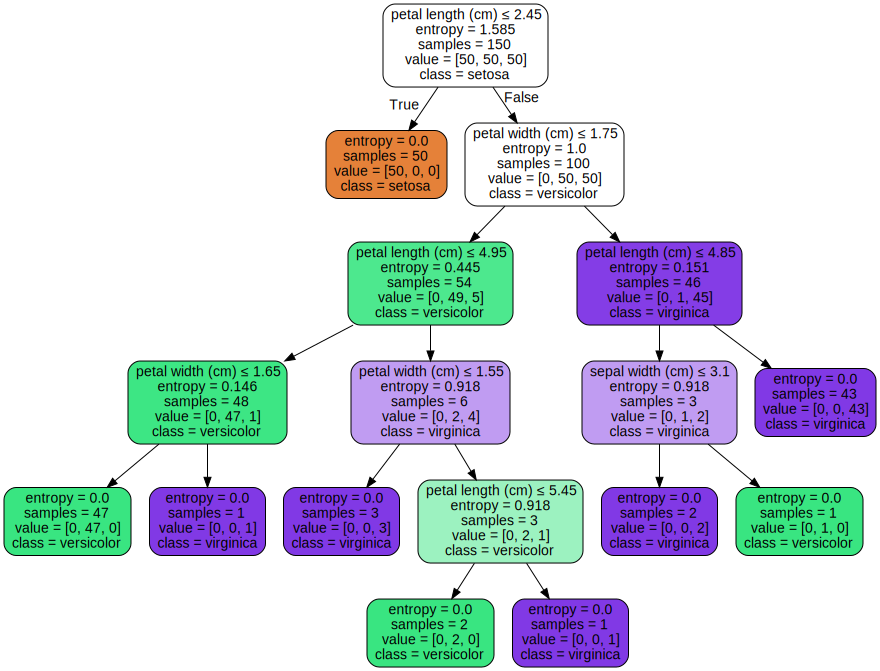

In [14]:
# 方法三
dot_data = tree.export_graphviz(dTree, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
graph

<hr style='border-color:brown; border-width:3px'>

## 二、建立 iris 決策樹模型 - 拆分訓練資料與測試資料

In [31]:
from sklearn.model_selection import train_test_split

### STEP 1: 拆分訓練資料與測試資料

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3) 

In [33]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

105
45
105
45


### STEP 2: 建立決策樹模型
- 使用 entropy 計算亂度

In [34]:
dTree = tree.DecisionTreeClassifier(criterion='entropy')

### STEP 3: 訓練決策樹模型

In [35]:
dTree = dTree.fit(X_train, y_train)

### STEP 4: 檢核訓練成果

In [36]:
dTree.score(X_train, y_train)

1.0

### STEP 5: 預測測試資料

In [37]:
dTree.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 2, 2, 1, 2, 2, 0, 1, 0,
       0, 0, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 0, 0, 2, 0, 0, 1, 2, 0, 1, 0,
       0])

### STEP 6: 檢核測試資料成果

In [38]:
dTree.score(X_test, y_test)

0.9555555555555556

<hr style='border-color:brown; border-width:3px'>

## 三、決策樹過度配適初步調整
- 調整樹高至多三層

In [39]:
dTree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
dTree = dTree.fit(X_train,y_train)

In [40]:
dTree.score(X_train, y_train)

0.9904761904761905

#### 上述訓練資練資料的 score 不再是 1.0，代表訓練資料不再過度訓練

In [41]:
dTree.score(X_test, y_test)

0.9111111111111111

### 輸出圖形

In [42]:
dot_data = tree.export_graphviz(dTree, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('iris2.pdf')  # 印出決策樹至 pdf 檔案

True

<hr style='border-color:brown; border-width:3px'>

## 四、決策樹使用 Gini 亂度因子

In [27]:
dTree = tree.DecisionTreeClassifier(criterion='gini', max_depth=3)
dTree = dTree.fit(X_train, y_train)

In [28]:
dTree.score(X_train, y_train)

0.9619047619047619

In [29]:
dTree.score(X_test, y_test)

0.9333333333333333

In [30]:
dot_data = tree.export_graphviz(dTree, out_file=None)
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('iris_gini_max_3.pdf')  # 印出決策樹至 pdf 檔案

True

In [75]:
import math

In [77]:
-1 * math.log2(2)

-1.0

In [86]:
math.log2(0.5)*(-0.5)

0.5

In [87]:
math.log2(0.5)*(-0.5)

0.5

<hr style='border-color:brown; border-width:3px'>

## 五、決策樹用藥案例 - sklearn
- 使用投影片案例的數據

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

### STEP 1: 建立資料與型別轉換

In [16]:
性別 = ['男','女','男','男','女','男','女','男','男','女','女','男']
年齡 = [20,73,37,33,48,29,52,42,61,30,26,54]
血壓 = ['正常','正常','高','低','高','正常','正常','低','正常','正常','低','高']
藥物 = ['A','B','A','B','A','A','B','B','B','A','B','A']

In [17]:
df = pd.DataFrame([性別,年齡,血壓,藥物])
df = df.T
df.columns=['性別','年齡','血壓','藥物']
data = df.copy()

In [18]:
df

,性別,年齡,血壓,藥物
0,男,20,正常,A
1,女,73,正常,B
2,男,37,高,A
3,男,33,低,B
4,女,48,高,A
5,男,29,正常,A
6,女,52,正常,B
7,男,42,低,B
8,男,61,正常,B
9,女,30,正常,A


```python
- 藥物是目標 target。
- 性別和血壓是類別型資料，'性別'沒有順序關係，'血壓'應該是順序型的類別，在進行類別型態資料轉換時，可考慮使用 'OrdinalEncoder'設定數字順序。
```

### 性別欄位以 LabelEncoder 轉換

In [19]:
lb = LabelEncoder() # 建立 labelencoder 物件
df['性別'] = lb.fit_transform(df['性別'])

### 血壓欄位以 OrdinalEncoder 轉換

In [21]:
ode = OrdinalEncoder(categories=[['低','正常','高']])
ode = ode.fit_transform(df[['血壓']])

In [22]:
df['血壓'] = ode
df

,性別,年齡,血壓,藥物
0,1,20,1.0,A
1,0,73,1.0,B
2,1,37,2.0,A
3,1,33,0.0,B
4,0,48,2.0,A
5,1,29,1.0,A
6,0,52,1.0,B
7,1,42,0.0,B
8,1,61,1.0,B
9,0,30,1.0,A


### STEP 2: 建立特徵 X，與目標 y

In [23]:
X = df.iloc[:, 0:3]
y = df.iloc[:, 3]

In [24]:
print(X[0:3])
print('-'*30)
print(y[0:3])

   性別  年齡   血壓
0   1  20  1.0
1   0  73  1.0
2   1  37  2.0
------------------------------
0    A
1    B
2    A
Name: 藥物, dtype: object


### STEP 3: 建立決策樹模型
- 使用 entropy 計算亂度

In [25]:
from sklearn import tree
from sklearn import datasets
import pydotplus

In [26]:
dTree = tree.DecisionTreeClassifier(criterion='entropy')

### STEP 4: 訓練決策樹模型

In [27]:
dTree = dTree.fit(X,y)

### STEP 5: 檢核訓練成果

In [28]:
dTree.score(X, y)

1.0

### 測試資料

In [29]:
dTree.predict([[1, 50, 1]])

array(['A'], dtype=object)

In [30]:
dTree.predict([[1, 5, 0]])

array(['B'], dtype=object)

### STEP 6: 決策模型輸出

In [31]:
dot_data = tree.export_graphviz(dTree, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('用藥決策樹.pdf')  # 印出決策樹至 pdf 檔案

True

<hr style='border-color:brown; border-width:3px'>

## 六、購買筆電決策樹案例 - sklearn 

In [48]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

### STEP 1: 建立資料與型別轉換

In [32]:
age = ['<=30','31..40','>40','>40','31..40','<=30','<=30','<=30','31..40','31..40','>40']
income = ['高','高','中','低','低','中','低','中','中','高','中']
student = ['否','否','否','是','是','否','是','是','否','是','是']
purchase = ['否','是','是','否','是','否','是','是','是','是','否']

In [33]:
df = pd.DataFrame([age,income,student,purchase])
df = df.T
df.columns = ['age','income','student','purchase']

In [34]:
df

,age,income,student,purchase
0,<=30,高,否,否
1,31..40,高,否,是
2,>40,中,否,是
3,>40,低,是,否
4,31..40,低,是,是
5,<=30,中,否,否
6,<=30,低,是,是
7,<=30,中,是,是
8,31..40,中,否,是
9,31..40,高,是,是


### 欄位型別轉換 -  `age` & `income` 屬性使用 OrdinanEncoder 指定高低順序

In [35]:
ode = OrdinalEncoder(categories=[['<=30','31..40','>40']])
df['age'] = ode.fit_transform(df[['age']])

In [41]:
ode = OrdinalEncoder(categories=[['低','中','高']])
df['income'] = ode.fit_transform(df[['income']])

### 欄位型別轉換 - student 屬性使用 LabelEncoder

In [36]:
lbe = LabelEncoder()
df['student'] = lbe.fit_transform(df['student'])

In [42]:
df

,age,income,student,purchase
0,0.0,2.0,0,否
1,1.0,2.0,0,是
2,2.0,1.0,0,是
3,2.0,0.0,1,否
4,1.0,0.0,1,是
5,0.0,1.0,0,否
6,0.0,0.0,1,是
7,0.0,1.0,1,是
8,1.0,1.0,0,是
9,1.0,2.0,1,是


### `purchase`是 target 欄位，可以接受字串。

In [109]:
from sklearn import tree

### STEP 2: 建立特徵X，與目標y

In [43]:
X = df[['age','income','student']].values
y = df['purchase']

### STEP 3: 建立決策樹模型
- 使用 entropy 計算亂度

In [44]:
dTree = tree.DecisionTreeClassifier(criterion='entropy')

### STEP 4: 訓練決策樹模型

In [45]:
dTree = dTree.fit(X, y)

### STEP 5: 檢核訓練成果

In [46]:
dTree.score(X,y)

1.0

### STEP 6: 決策模型輸出

In [47]:
import graphviz
dot_data = tree.export_graphviz(dTree, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("purchase")

'purchase.pdf'

### 測試資料

In [48]:
dTree.predict(X)

array(['否', '是', '是', '否', '是', '否', '是', '是', '是', '是', '否'],
      dtype=object)

### 測試一筆資料

In [49]:
dTree.predict([[2,2,1]])

array(['否'], dtype=object)